In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [171]:
w, h = 500, 150
star_radius = 100
area_star_fractional = []
star = np.zeros((2*h, 2*w))
star_mask = create_circular_mask(2*h, 2*w, radius=star_radius)
star[star_mask] = 1.0
area_star_total = np.sum(star)

for x in range(2*w):
    star = np.zeros((2*h, 2*w))

    star_mask = create_circular_mask(star.shape[0], star.shape[1], radius=star_radius)
    planet_mask = create_circular_mask(star.shape[0], star.shape[1], center=(2*w-x, h-0), radius=50)
    atmos_mask = planet_mask^create_circular_mask(star.shape[0], star.shape[1], center=(2*w-x, h-0), radius=100)
    atmos_mask = np.logical_and(atmos_mask, star_mask)

    star[star_mask] = 1.0
    star[atmos_mask] = .8
    star[planet_mask] = 0.0

    area_star_fractional.append(np.sum(star))

area_star = np.array(area_star_fractional)/area_star_total

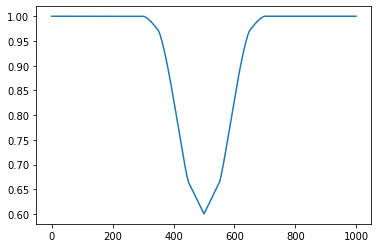

In [172]:
plt.plot(range(w*2), area_star)